This is a jupyter notebook using gradient descent to solve logisitic regression problems with l2 pelnalized term. 

In [17]:
import numpy as np
from sklearn import preprocessing
import pycasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn import linear_model
import time
import os

import pdb
from sklearn.metrics import accuracy_score
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


In [18]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "pic")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Ridge Penalized Logistic Regression $2d$

In [19]:
def LR_function_2d(X,A,b,labd):
    n, d = A.shape
    rp = np.dot(X,A)
#     return (np.sum(np.log(1 + np.exp(rp)) - b*rp, axis=0)/n).reshape(2,1) + (labd*np.square(np.linalg.norm(X,axis=0))).reshape(2,1)
    return (np.sum(np.log(1+np.exp(rp)) - Y*rp, axis = 1)/2 + labd*np.square(np.linalg.norm(X,axis = 1))).reshape(-1)

In [105]:
def generate_sim_lognet(n, d, c, seed=1024):
    np.random.seed(seed)
    cor_X = c
    S = cor_X * np.ones((d, d)) + (1 - cor_X) * np.diag(np.ones(d))
    R = np.linalg.cholesky(S)

    X = np.dot(np.random.normal(size=n * d).reshape(n, d), R)
    X = preprocessing.scale(X) * np.sqrt(float(n - 1) / n)

    s = 20
    true_beta = np.zeros(d)
    true_beta[0:s] = np.random.uniform(low=0, high=1.0, size=s)

  # strictly seperable
    Y = np.random.binomial(1, 1 / (1 + np.exp(-np.dot(X, true_beta))))

    return (X, Y, true_beta)

In [20]:
## Generate A 2*2 matrix and b 
np.random.seed(1024)
d = 2
cor_X = 0
S = cor_X * np.ones((d,d)) + (1 - cor_X)*np.diag(np.ones(d))
R = np.linalg.cholesky(S)

A = np.dot(np.random.normal(size= 2*2).reshape(2,2),R)
A = preprocessing.scale(A) * np.sqrt(float(d - 1)/d)

In [21]:
S

array([[1., 0.],
       [0., 1.]])

In [22]:
A

array([[ 0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [23]:
b = np.array((1,-1))

In [24]:
b.shape

(2,)

In [25]:
labd = np.sqrt(1/d)

In [194]:
def x_Initialization(d):
    x = 5*np.ones((d,1))
    return x 

In [184]:
def cost_LR_L2(w,A,b,labd):
    cost =(1/n)*np.sum(np.log(1 + np.exp(np.dot(A,w))) - np.multiply(b,np.dot(A,w))) + labd * np.square(np.linalg.norm(w))
    return cost 

In [162]:
def gradient_LR_L2(w,A,b,labd):
    n,d = A.shape
    dw = np.zeros((d,1))
    for j in range(d):
        temp = np.multiply(np.multiply(1./(1+np.exp(np.dot(A,w))), np.exp(np.dot(A,w))), A[:,j].reshape(n,1))
        temp2 = np.dot(b, A[:,j])
        dw[j] = (1/n)*(np.sum(temp - temp2)) + 2*labd*w[j]
    return dw

In [163]:
def model_optimize(w,A,b,labd):
    n, d = A.shape
    
    # compute cost 
    cost = cost_LR_L2(w,A,b,labd)
    
    # compute derivative 
    dw = gradient_LR_L2(w,A,b,labd)
    
    grads = {"dw": dw}
    return grads, cost 
    
    

In [189]:
def model_predict(w, A,b, learning_rate, no_iterations):
    costs = []
    n,d = A.shape
#     labd = np.sqrt(1/d)
    labd = 0
    for i in range(no_iterations):
        grads, cost = model_optimize(w,A,b,labd)
        dw = grads["dw"]
        w = w - (learning_rate*dw)
        
        if (i%50 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
            
    # final parameters 
    coeff = {"w": w}
    gradient = {"dw": dw}
    
    return coeff, gradient, costs 

In [179]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred


In [180]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [195]:
A,b,true_beta = generate_sim_lognet(50, 200, 0.1, seed=1024)
#Get number of features
n_features = A.shape[1]
print('Number of Features', n_features)
w = x_Initialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, A, b, learning_rate=0.0001,no_iterations=1000)
#Final prediction
w = coeff["w"]
print('Optimized weights', w)
#
final_train_pred = sigmoid_activation(np.dot(A,w))
#
m_tr =  A.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, b))
#


Number of Features 200
Cost after 0 iteration is 3741.001492
Cost after 50 iteration is 3767.649061
Cost after 100 iteration is 3794.302972
Cost after 150 iteration is 3820.959015
Cost after 200 iteration is 3847.615779
Cost after 250 iteration is 3874.272800
Cost after 300 iteration is 3900.929932
Cost after 350 iteration is 3927.587159
Cost after 400 iteration is 3954.244543
Cost after 450 iteration is 3980.902259
Cost after 500 iteration is 4007.560718
Cost after 550 iteration is 4034.220842
Cost after 600 iteration is 4060.884693
Cost after 650 iteration is 4087.556806
Cost after 700 iteration is 4114.246883
Cost after 750 iteration is 4140.974375
Cost after 800 iteration is 4167.773392
Cost after 850 iteration is 4194.689543
Cost after 900 iteration is 4221.757235
Cost after 950 iteration is 4248.971781
Optimized weights [[6.3131091 ]
 [6.45872837]
 [6.54777922]
 [6.01944392]
 [6.05943001]
 [6.0015645 ]
 [6.40279836]
 [6.24268801]
 [5.73829596]
 [5.82003415]
 [5.91419906]
 [5.7095

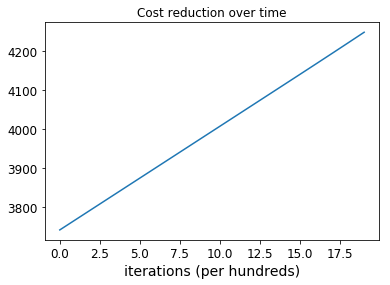

In [196]:
plt.figure()
plt.plot(costs)
plt.savefig("LR_L2_SGD:"+".png")
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [183]:
costs

[array([34.65735903]),
 array([46.05827801]),
 array([70.54327569]),
 array([99.44612504]),
 array([129.96705178]),
 array([161.18840529]),
 array([192.77116605]),
 array([224.57301651]),
 array([256.52614005]),
 array([288.5942407]),
 array([320.75591681]),
 array([352.99757791]),
 array([385.31011951]),
 array([417.68720862]),
 array([450.12432175]),
 array([482.61816559]),
 array([515.16630824]),
 array([547.76693438]),
 array([580.41867755]),
 array([613.12050263])]